In [134]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
import astropy.constants as const
from scipy.optimize import curve_fit
from scipy.odr import Model, ODR, RealData
import os

textwidth=.7

# fonts
fsize = 14*textwidth
tsize = 14*textwidth

# lines
lwidth = 1.5
lhandle = 2.0

# figsize
fwidth = 6.05434*textwidth
fheight = 4.540755*textwidth

colors = cycler('color', ['navy', 'orange', 'green', 'red', 'm', 'deepskyblue'])

plt.rcParams['text.usetex'] = True

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (fwidth, fheight)
plt.rcParams['axes.prop_cycle'] = colors
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8.0
plt.rcParams['xtick.minor.size'] = 4.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.major.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 4.0
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in"

plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

def fit(f, x, y, p0, sx=None, sy=None):
	"""
	fit unsing scipy.odr
	:params:
	f : func(p, x) with p a list of params
	x : x data
	y : y data
	sx: x error
	sy: y error
	p0: initial guesses
	"""
	function = Model(f)

	data = RealData(x, y, sx=sx, sy=sy)

	odr = ODR(data, function, beta0=p0)

	out = odr.run()

	print(out.pprint())

	return out.beta, out.sd_beta




In [135]:
# try:
#     os.system("rm -r ROC_all_utils")
# except: 
#     pass

# os.system("mkdir ROC_all_utils")
# os.system("ls -d stars_* > ROC_all_utils/dirs_with_data.txt")

In [136]:
dir_list = np.array(open("ROC_all_utils/dirs_with_data.txt").read().split("\n"))[:-1]
dir_list

array(['stars_bins_16', 'stars_flip_lay_4_bins_64', 'stars_lay_16',
       'stars_lay_16_bins_16', 'stars_lay_8', 'stars_maf',
       'stars_maf_permute_lay_8', 'stars_permute_lay_16_bins_16',
       'stars_permute_lay_32_bins_32', 'stars_permute_lay_4_bins_128',
       'stars_permute_lay_4_bins_64', 'stars_permute_lay_64',
       'stars_permute_lay_8', 'stars_permute_lay_8_bins_64',
       'stars_realnvp', 'stars_vanilla'], dtype='<U28')

In [137]:
label_names = ["NSF-F 8L 16B",
               "NSF-F 4L 64B",
              "NSF-F 16L 8B",
              "NSF-F 16L 16B",
              "NSF-F 8L 8B",
              "MAF-F 4L",
              "MAF-R 8L",
              "NSF-R 16L 16B",
              "NSF-R 32L 32B",
              "NSF-R 4L 128B",
              "NSF-R 4L 64B",
              "NSF-R 64L 8B",
              "NSF-R 8L 8B",
              "NSF-R 8L 64B",
              "Real NVP",
              "NSF-F 8L 8B no norm."]
if len(label_names) != len(dir_list):
    raise NameError("Not all Archs named!")
label_dict = dict(zip(dir_list, label_names))
label_dict

{'stars_bins_16': 'NSF-F 8L 16B',
 'stars_flip_lay_4_bins_64': 'NSF-F 4L 64B',
 'stars_lay_16': 'NSF-F 16L 8B',
 'stars_lay_16_bins_16': 'NSF-F 16L 16B',
 'stars_lay_8': 'NSF-F 8L 8B',
 'stars_maf': 'MAF-F 4L',
 'stars_maf_permute_lay_8': 'MAF-R 8L',
 'stars_permute_lay_16_bins_16': 'NSF-R 16L 16B',
 'stars_permute_lay_32_bins_32': 'NSF-R 32L 32B',
 'stars_permute_lay_4_bins_128': 'NSF-R 4L 128B',
 'stars_permute_lay_4_bins_64': 'NSF-R 4L 64B',
 'stars_permute_lay_64': 'NSF-R 64L 8B',
 'stars_permute_lay_8': 'NSF-R 8L 8B',
 'stars_permute_lay_8_bins_64': 'NSF-R 8L 64B',
 'stars_realnvp': 'Real NVP',
 'stars_vanilla': 'NSF-F 8L 8B no norm.'}

In [138]:
fpr, tpr, auc = [], [], []
names = []

for D in dir_list:
    try:
        fpr.append(np.load(f"{D}/fpr.npy"))
        tpr.append(np.load(f"{D}/tpr.npy"))
        auc.append(float(np.load(f"{D}/auc.npy")))

        names.append(D[6:])
    except:
        pass
    
order = np.argsort(auc)

auc_sorted = np.sort(auc)

ratios = auc_sorted[1:] / auc_sorted[:-1]

for i_r, i in enumerate(order[:-1]):
    print(f"{names[i]} {auc[i]:.4f} \n\t\t   \ \n  \t\t{(ratios[i_r] - 1):%}\n\t\t   /")
print(names[order[-1]], auc[order[-1]])

maf_permute_lay_8 0.2529 
		   \ 
  		97.710757%
		   /
permute_lay_64 0.4999 
		   \ 
  		73.685762%
		   /
realnvp 0.8683 
		   \ 
  		13.365143%
		   /
bins_16 0.9844 
		   \ 
  		1.241707%
		   /
lay_8 0.9966 
		   \ 
  		0.044272%
		   /
flip_lay_4_bins_64 0.9971 
		   \ 
  		0.054248%
		   /
permute_lay_4_bins_128 0.9976 
		   \ 
  		0.000416%
		   /
lay_16 0.9976 
		   \ 
  		0.006868%
		   /
permute_lay_8_bins_64 0.9977 
		   \ 
  		0.022581%
		   /
permute_lay_8 0.9979 
		   \ 
  		0.006658%
		   /
lay_16_bins_16 0.9980 
		   \ 
  		0.008634%
		   /
permute_lay_4_bins_64 0.9980 
		   \ 
  		0.030061%
		   /
permute_lay_16_bins_16 0.9983 
		   \ 
  		0.037643%
		   /
maf 0.9987 
		   \ 
  		0.015488%
		   /
permute_lay_32_bins_32 0.9988756789528761


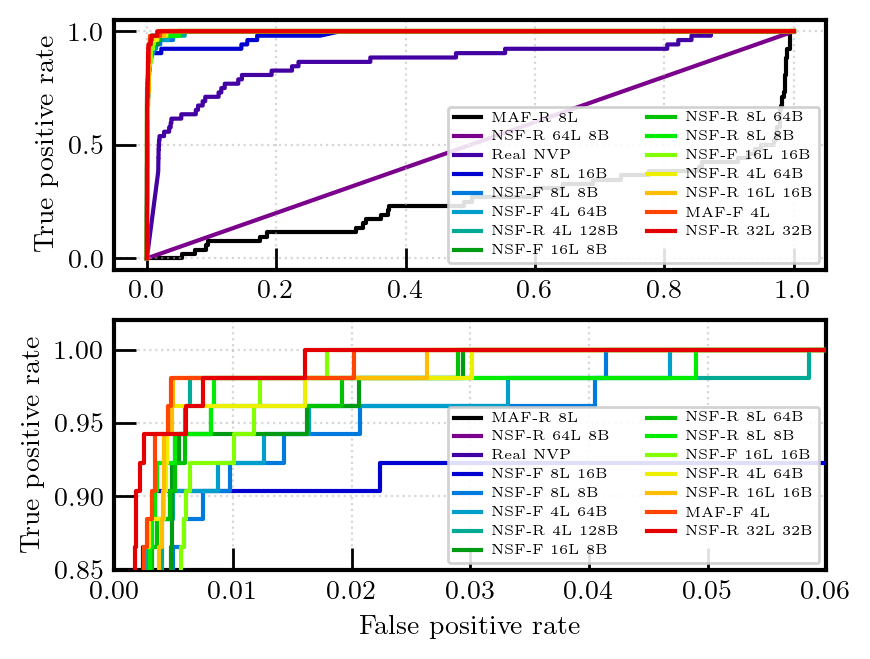

In [139]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=200, constrained_layout=True)

for ax in ax1, ax2:
    for c_i, i in enumerate(order):
        try:
            ax.plot(fpr[i], tpr[i], label=label_dict[dir_list[i]], ls="-", lw=1.5, 
                    color=plt.cm.nipy_spectral(c_i/1.05/order.size), zorder=c_i)
        except:
            pass

    ax.grid(alpha=.5, ls=":")
    ax.legend(frameon=True, ncol=2, loc="lower right", framealpha=.88, fancybox=True, fontsize=0.5*fsize)

    ax.set_ylabel("True positive rate")
    
ax2.set_xlabel("False positive rate")
ax2.set_xlim(-.0, 0.06)
ax2.set_ylim(0.85, 1.02)

plt.savefig("figs/roc.pdf", bbox_inches="tight")

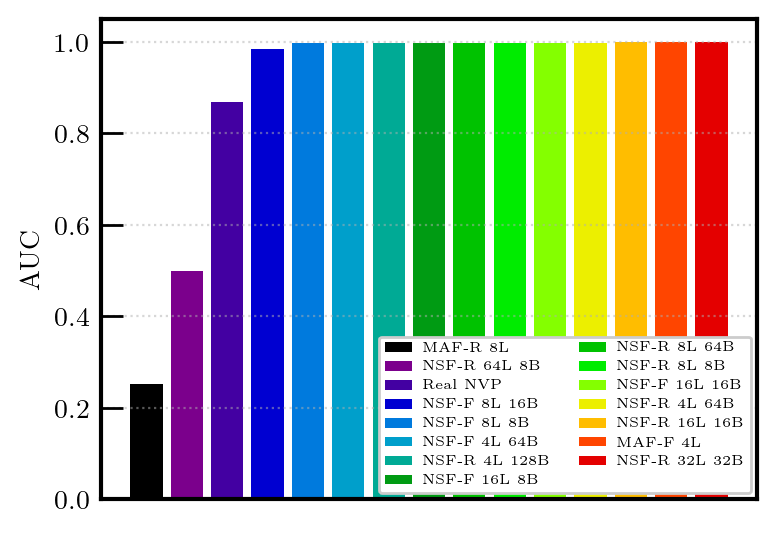

In [140]:
for c_i, i in enumerate(order):
    plt.bar(c_i, auc[i], label=label_dict[dir_list[i]], color=plt.cm.nipy_spectral(c_i/order.size/1.05),
           linewidth=0)
# plt.hlines(1, *plt.gca().get_xlim(), lw=0.5, color="black")
    
plt.legend(frameon=True, ncol=2, loc="lower right", framealpha=1, fancybox=True, fontsize=0.5*fsize)

plt.grid(alpha=.5, ls=":")

plt.xticks([])

plt.ylabel("AUC")

plt.savefig("figs/auc.pdf", bbox_inches="tight")

In [141]:
z_ord = []

for i in range(len(fpr)):
    mask = fpr[i]==0
    z_ord.append(max(tpr[i][mask]))

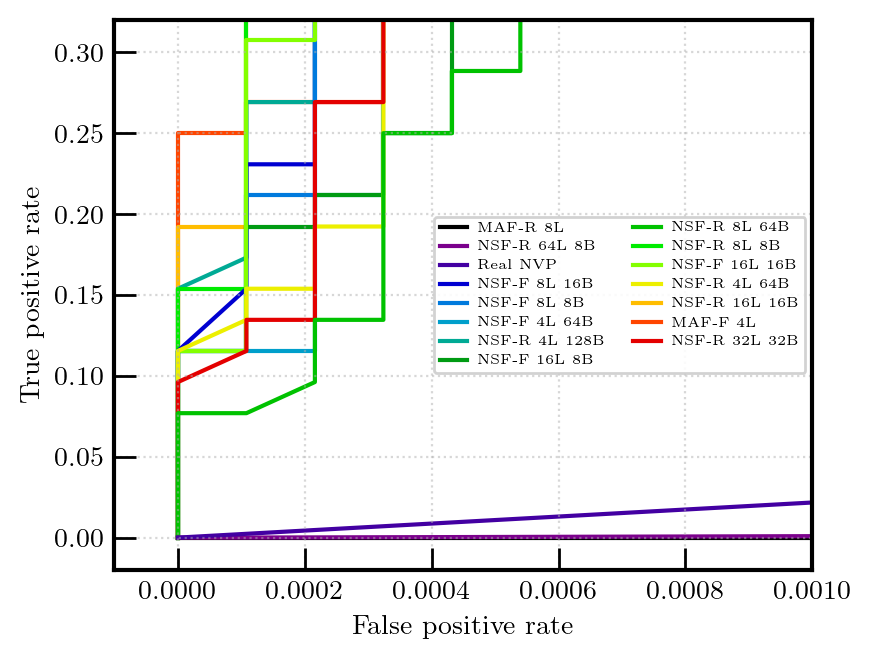

In [142]:
fig, ax = plt.subplots(nrows=1, dpi=200, constrained_layout=True)

for c_i, i in enumerate(order):
    try:
        ax.plot(fpr[i], tpr[i], label=label_dict[dir_list[i]], ls="-", lw=1.5, 
                color=plt.cm.nipy_spectral(c_i/1.05/order.size), zorder=-z_ord[i])
    except:
        pass

ax.grid(alpha=.5, ls=":")
ax.legend(frameon=True, ncol=2, loc="best", framealpha=.88, fancybox=True, fontsize=0.5*fsize)

ax.set_ylabel("True positive rate")
    
ax.set_xlabel("False positive rate")
ax.set_xlim(-.0001, .001)
ax.set_ylim(-.02, 0.32)

plt.savefig("figs/roc_cleanest.pdf", bbox_inches="tight")